In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [33]:
# Load data (as "Bunch" object from Scikit-Learn)
iris = datasets.load_iris()

# Convert to Pandas dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Rename columns and preprocess formatting
iris_df['species'] = pd.Categorical.from_codes(codes = iris.target, categories = iris.target_names)
iris_df['target'] = iris_df['target'].astype(int)
new_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_code', 'species_name']
iris_df.columns = new_columns

In [34]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_code,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species_code,species_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [36]:
# Explore an individual column
iris_df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [37]:
# Explore an individual data subset by location
iris_df.loc[0:4, 'sepal_length']

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [38]:
# Summarize the data
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [39]:
# Summarize the data but change the quantile visualized
iris_df.describe(percentiles=[0.33, 0.66])

,sepal_length,sepal_width,petal_length,petal_width,species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
33%,5.400000,2.900000,2.087000,0.668000,0.170000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
66%,6.234000,3.200000,4.834000,1.600000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


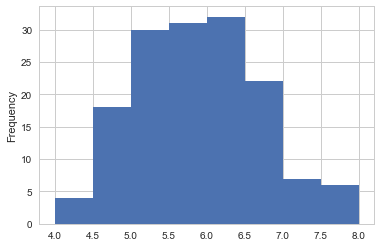

In [40]:
# Plots
iris_df['sepal_length'].plot(kind='hist', bins=[4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])

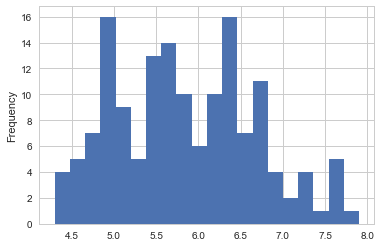

In [41]:
iris_df['sepal_length'].plot(kind='hist', bins=20)

In [42]:
# Evaluate covariance of sepal_length and petal_length
iris_df['sepal_length'].cov(iris_df['petal_length'])

1.2736823266219246

In [43]:
iris_df.iloc[:,0:4].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [44]:
# Data aggregation by the class algorithm
iris_df.groupby(['species_name'])['sepal_length'].count()

species_name
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

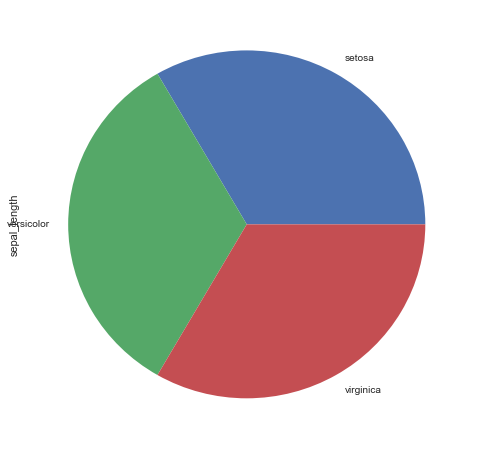

In [45]:
# Pie chart
iris_df.groupby(['species_name'])['sepal_length'].count().plot(kind='pie', figsize=(8,8))

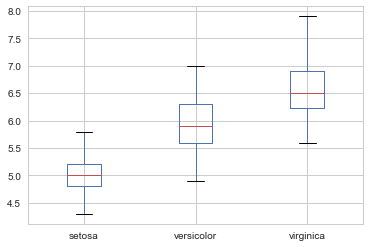

In [46]:
# Boxplot to visualize distribution/range and outliers.
# Middle bar = median (50th percentile)
# Box = interquartile range (25th-75th percentile)
iris_df.pivot(columns='species_name', values='sepal_length').plot(kind='box')

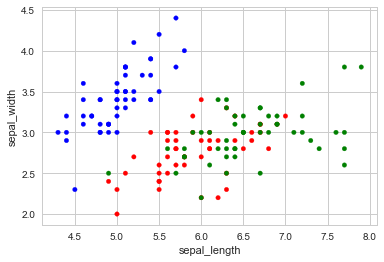

In [47]:
# Scatterplot
color_map = {'setosa':'blue', 'versicolor':'red', 'virginica':'green'}
iris_df.plot(kind='scatter', x='sepal_length', y='sepal_width', c=iris_df['species_name'].map(color_map))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f59c128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1203e1320>]], dtype=object)

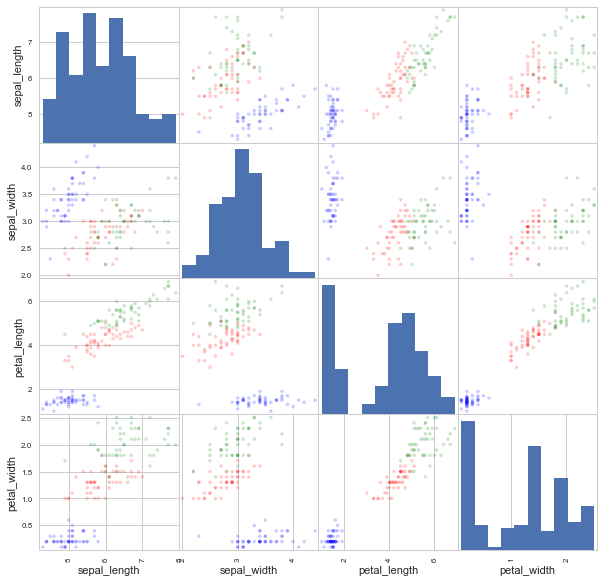

In [48]:
# Generate a matrix of scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(frame=iris_df.iloc[:,0:4], alpha=0.2, figsize=(10,10), c=iris_df['species_name'].map(color_map))

# Part 2 -- K-means clustering
In this section, we will remove the labels (species_name and species_code) and move them to a separate dataframe (target_df). Then, we will use a K-means clustering algorithm to identify three clusters. Finally, we will compare the accuracy of the model against the true labels contained in target_df.

In [49]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_code,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [50]:
y_truth = iris_df.iloc[:,4:6]
y_truth.head()

,species_code,species_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


In [51]:
X = iris_df.drop(['species_code', 'species_name'], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
iris_df.head() # Just checking to make sure that the original dataframe is not affected.

,sepal_length,sepal_width,petal_length,petal_width,species_code,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


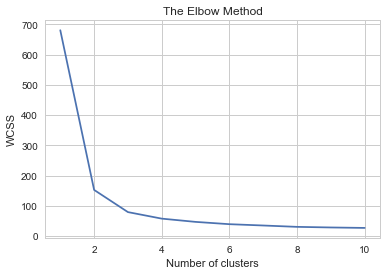

In [53]:
# Perform the K-means clustering
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

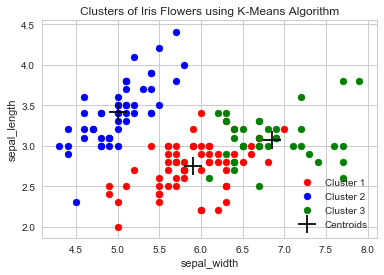

In [59]:
# Visualising the clusters
# Note: Be sure to use .values to get NumPy array from Pandas dataframe.
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', marker='+', label = 'Centroids')
plt.title('Clusters of Iris Flowers using K-Means Algorithm')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.legend()
plt.show()

In [56]:
# How much do the original labels match with the clusters?
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [57]:
# Add the K-means predictions as a new column in the iris dataframe.
iris_df['prediction'] = pd.Series(y_kmeans)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_code,species_name,prediction
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [58]:
pd.crosstab(iris_df['species_name'], iris_df['prediction'], margins=True)

prediction,0,1,2,All
species_name,,,,
setosa,0,50,0,50
versicolor,48,0,2,50
virginica,14,0,36,50
All,62,50,38,150


# Part 3 -- Decision Tree

In [63]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
y_truth.head()

,species_code,species_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa


In [65]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X.values, y_truth['species_code'].values)

In [66]:
type(clf)

sklearn.tree.tree.DecisionTreeClassifier

In [67]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


*Note: There is no built-in visualizer for trees in Python or Scikit-Learn, so I had to go hunt for one on GitHub... See <a href="https://github.com/scikit-learn/scikit-learn/files/902272/treeviz.txt">here</a>*.

In [69]:
"""
treeviz.py
A simple tree visualizer for sklearn DecisionTreeClassifiers.
Written by Lutz Hamel, (c) 2017 - Univeristy of Rhode Island
https://github.com/scikit-learn/scikit-learn/files/902272/treeviz.txt
"""
import operator

def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |',end='')

	#  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
	#        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
        max_label = labels[max_index]
        print(max_label)
        return tlevel_index
    
    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)


In [71]:
tree_print(clf, X)

if petal_length =< 2.450000047683716: 
  |then 0
  |else if petal_width =< 1.75: 
  |  |then if petal_length =< 4.949999809265137: 
  |  |  |then if petal_width =< 1.6500000953674316: 
  |  |  |  |then 1
  |  |  |  |else 2
  |  |  |else if petal_width =< 1.5499999523162842: 
  |  |  |  |then 2
  |  |  |  |else if sepal_length =< 6.949999809265137: 
  |  |  |  |  |then 1
  |  |  |  |  |else 2
  |  |else if petal_length =< 4.850000381469727: 
  |  |  |then if sepal_length =< 5.949999809265137: 
  |  |  |  |then 1
  |  |  |  |else 2
  |  |  |else 2
<------------->
Tree Depth:  5
